# Assignment_2 Ajaykumar Panchal

(Working on Credit.csv, Applying Linear Regression,RANSAC and Robust)

#### Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('Credit.csv')
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [4]:
df = df.drop(['Unnamed: 0'],1)

In [5]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

#### Label Encoding on Gender, Student, Married, Ethanicity columns

In [10]:
df['Gender'] = (df['Gender'].astype('category')).cat.codes
df['Married'] = (df['Married'].astype('category')).cat.codes
df['Student'] = (df['Student'].astype('category')).cat.codes
df['Ethnicity'] = (df['Ethnicity'].astype('category')).cat.codes

In [12]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender          int8
Student         int8
Married         int8
Ethnicity       int8
Balance        int64
dtype: object

In [18]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,0,0,1,2,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,2,331


In [21]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,-0.010738,0.019632,0.035652,-0.032888,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.009397,-0.006015,0.031155,-0.020837,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.008885,-0.002028,0.036751,-0.020288,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,-0.022658,-0.026164,-0.009695,-0.003867,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.004015,-0.029844,-0.073136,-0.032451,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.005049,0.072085,0.048911,-0.030055,-0.008062
Gender,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,1.000000,0.055034,0.012452,0.001514,0.021474
Student,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.055034,1.000000,-0.076974,-0.030261,0.259018
Married,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,0.012452,-0.076974,1.000000,0.060563,-0.005673
Ethnicity,-0.032888,-0.020837,-0.020288,-0.003867,-0.032451,-0.030055,0.001514,-0.030261,0.060563,1.000000,-0.009157


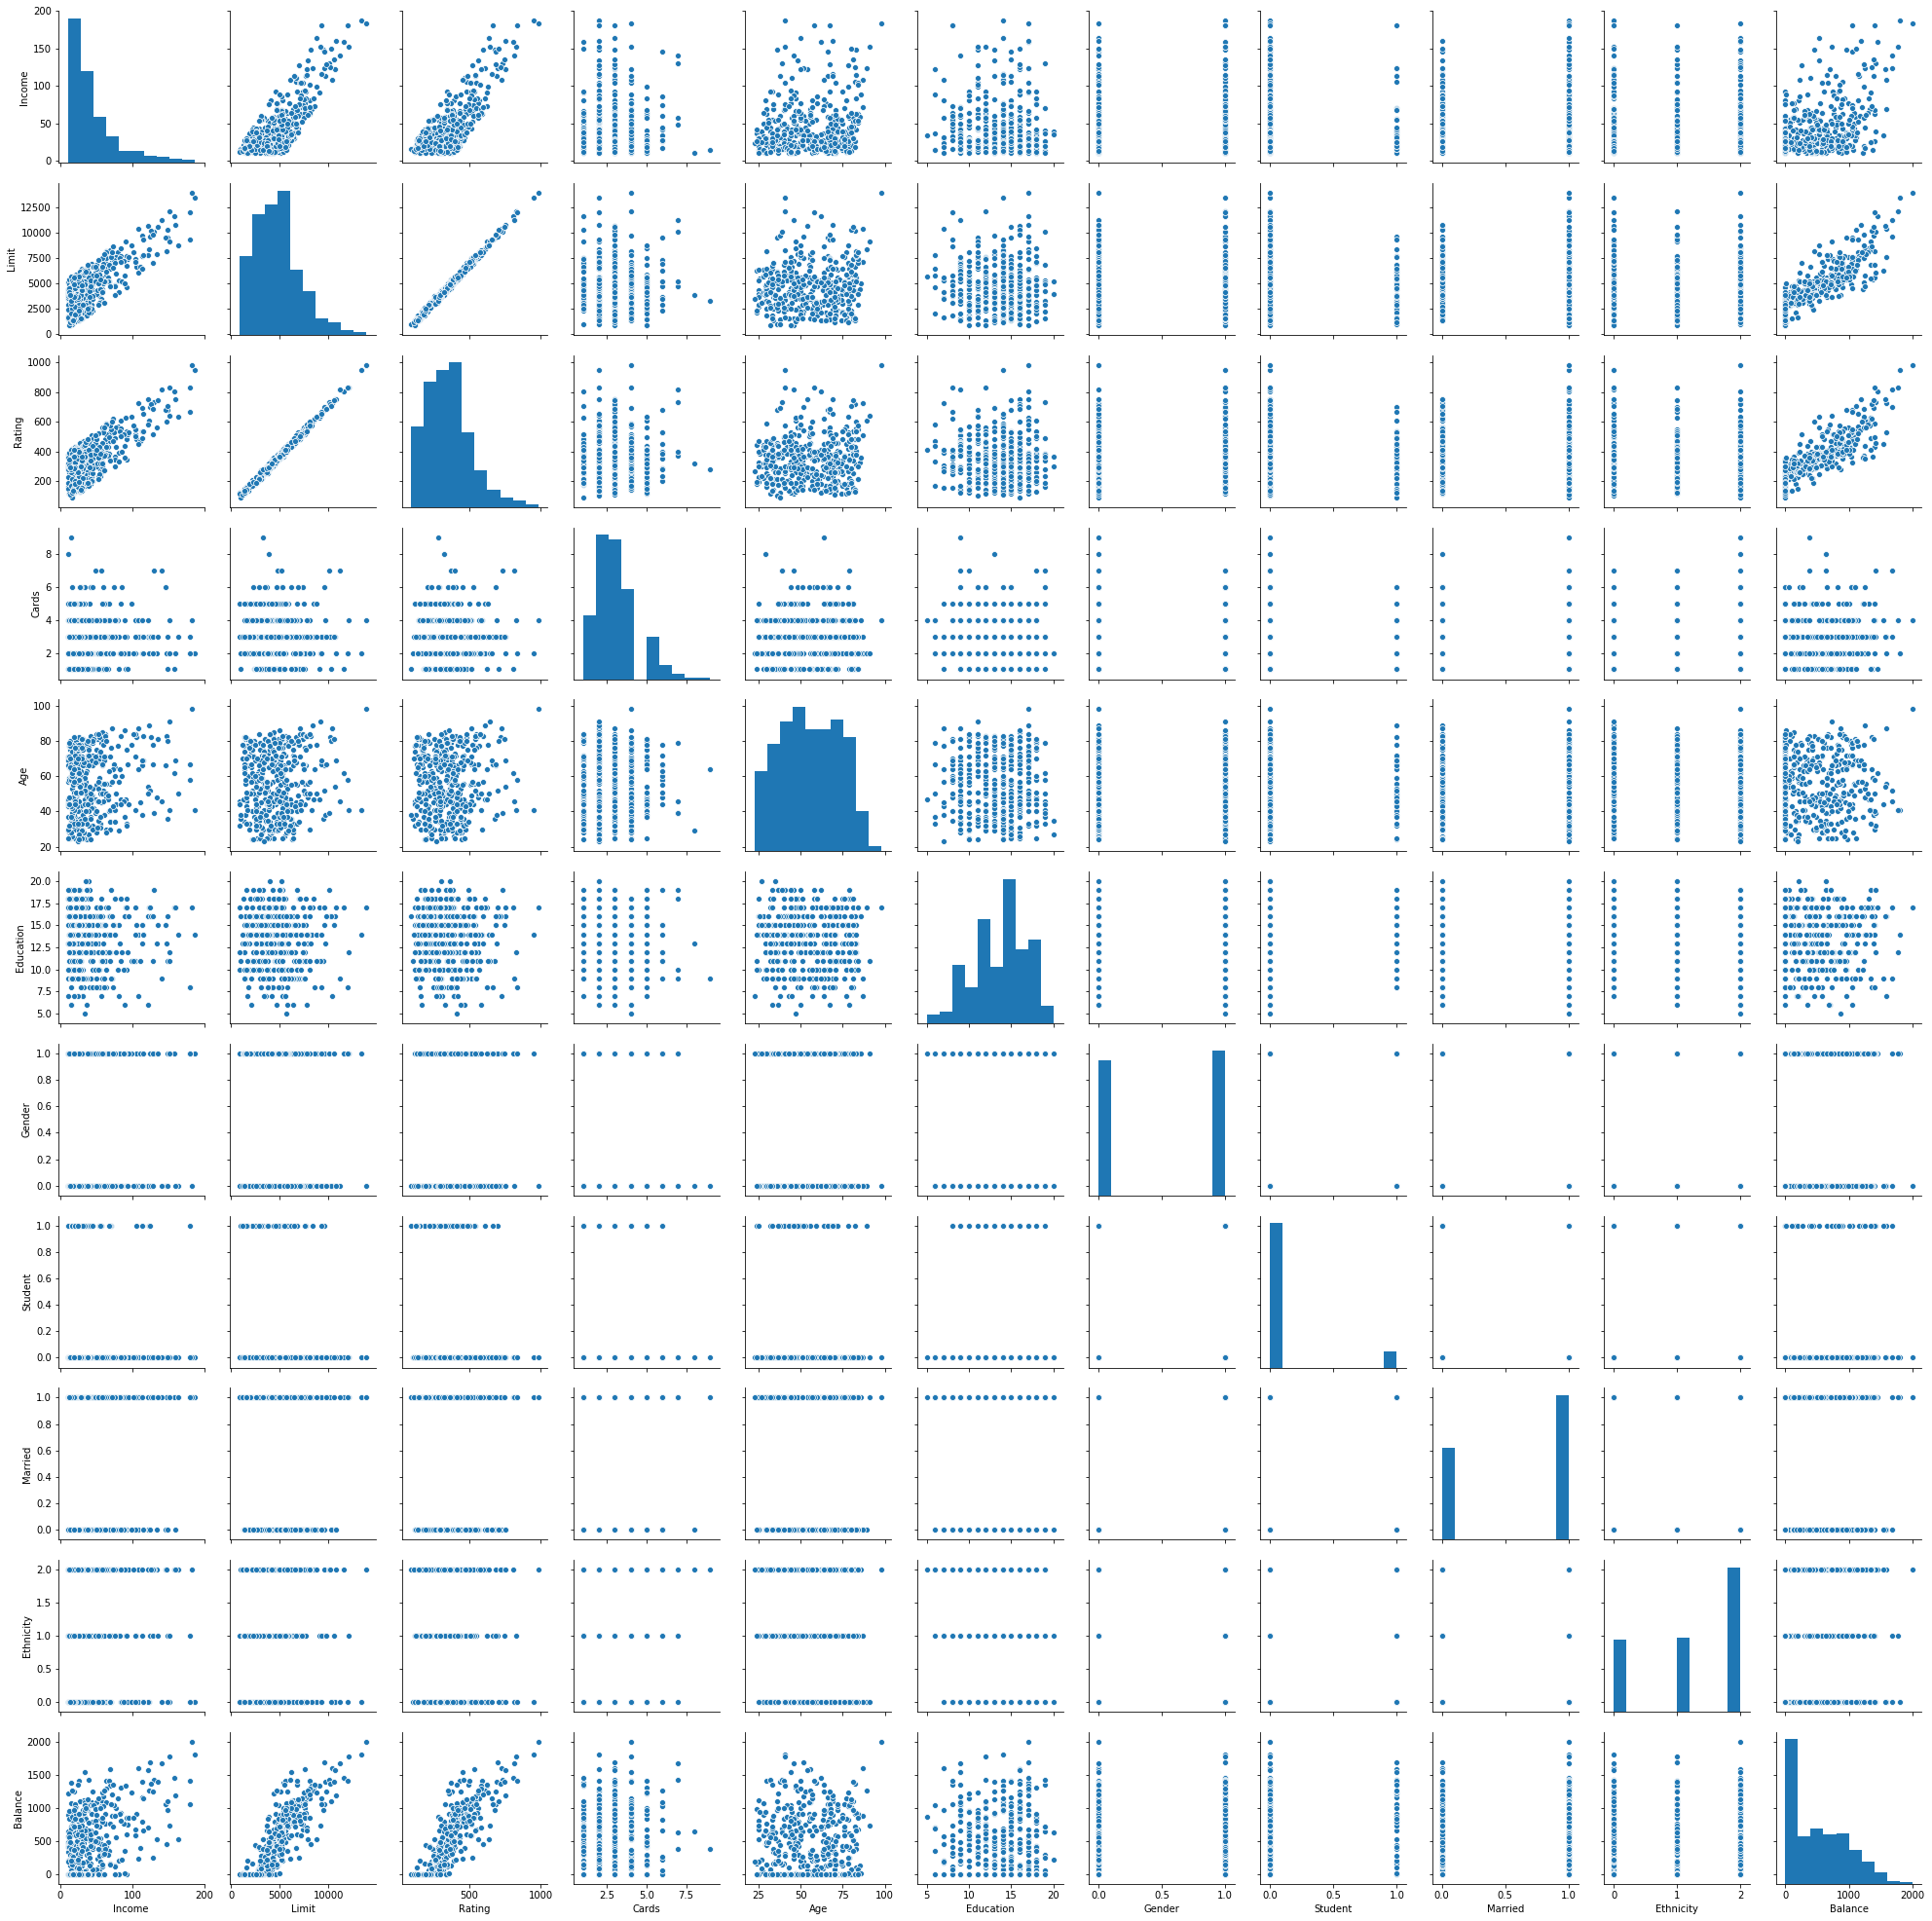

In [27]:
sns.pairplot(df, height=2.5)
plt.show()

### Feature Selection using Pearson correlation HeatMap

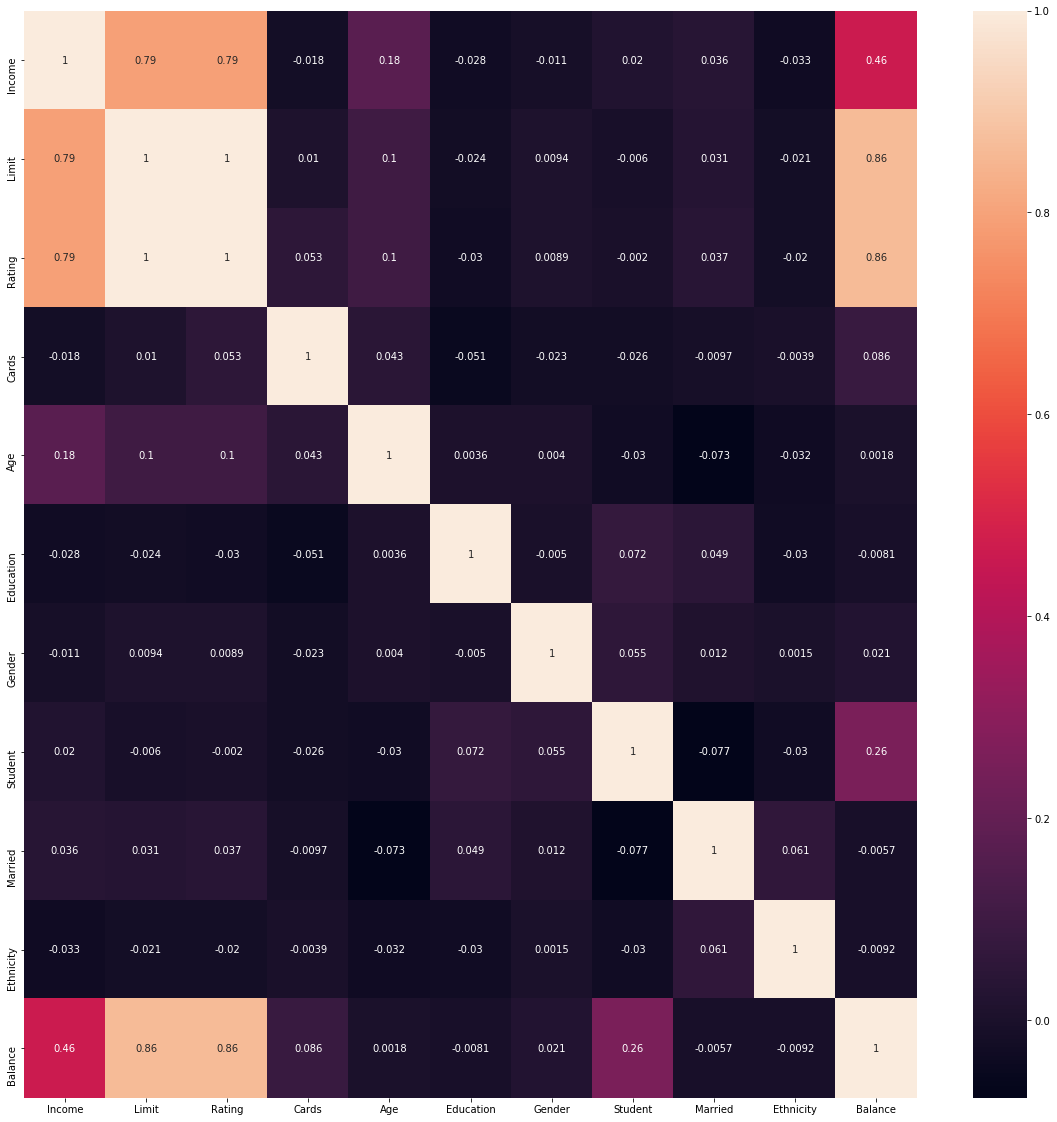

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True )
plt.show()

In [142]:
X = df['Limit'].values.reshape(-1,1)

In [143]:
y = df['Balance']

In [144]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

In [145]:
lr = LinearRegression()

In [146]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [147]:
r2_score(y_test,y_pred)

0.6489834890061115

Text(0, 0.5, 'Balance')

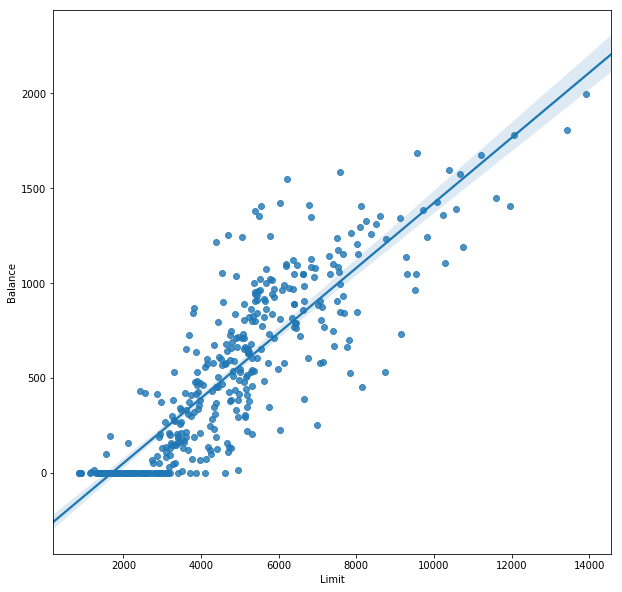

In [148]:
plt.figure(figsize=(10,10))
sns.regplot(X,y)
plt.xlabel('Limit')
plt.ylabel('Balance')
# plt.scatter(X,y)

##### Accuracy of the model using Pearson Correlation HeatMap : 64.9%

### Feature selection using Backward Elimination

In [149]:
df.head()

,const,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1.0,14.891,3606,283,2,34,11,0,0,1,2,333
1,1.0,106.025,6645,483,3,82,15,1,1,1,1,903
2,1.0,104.593,7075,514,4,71,11,0,0,0,1,580
3,1.0,148.924,9504,681,3,36,11,1,0,0,1,964
4,1.0,55.882,4897,357,2,68,16,0,0,1,2,331


### Backward Elimination using function

In [150]:
def backward_elimination(Y,X):
    cols = list(X.columns)
    while len(cols) > 0:
        p = []
        X_new = X[cols]
        X_new = sm.add_constant(X_new)
        model = sm.OLS(Y, X_new).fit()
        pvalues = pd.Series(model.pvalues.values[:],index = cols)
        max_pvalues = max(pvalues)
        feature_with_max_pvalues = pvalues.idxmax()
        if max_pvalues > 0.05:
            cols.remove(feature_with_max_pvalues)
        else:
            return cols
            break
        
        

In [151]:
_X = df.drop(['Balance'],1)
_y = df['Balance']

In [152]:
featrue_selected = backward_elimination(_y,_X)

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [153]:
_X_fe = df[featrue_selected]
_y_fe = _y

In [154]:
_X_fe = _X_fe.drop(['const'],1)

In [155]:
_X_train, _X_test, _y_train, _y_test = tts(_X_fe, _y_fe, test_size = 0.3, random_state = 42)

In [156]:
lr.fit(_X_train,_y_train)
_y_preds = lr.predict(_X_test)

In [157]:
r2_score(_y_test,_y_preds)

0.9521406699153723

##### Accuracy of the model using Backward Elimination : 95.2%

#### What does Standard error in a feature variable mean in linear regression? Is it the same as the weight of a feature (parameter)?

# ElasticNet Regresssion 

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [159]:
elastic_net = ElasticNet(normalize=True)

In [160]:
X  = df.drop(['Balance'],1)
y = df['Balance']

In [161]:
model = GridSearchCV(cv = 10 , estimator=elastic_net, param_grid= {'alpha':[0,1,2,3,4,5],'l1_ratio':np.arange(0.1,0.9,0.1)})
model_elastic = model.fit(X,y)

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge we

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge we

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge we

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might 

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge we

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [162]:
model_elastic.best_estimator_

ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
model_elastic.best_params_

{'alpha': 0, 'l1_ratio': 0.1}

In [164]:
model_elastic.best_score_

0.9501815959086103

##### Accuracy of the model using ElasticNet Regression : 95%

In [169]:
elastic = ElasticNet(normalize=True,alpha=0,l1_ratio=0.1)

In [170]:
elastic.fit(X,y)

K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
K:\Users\apanchal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

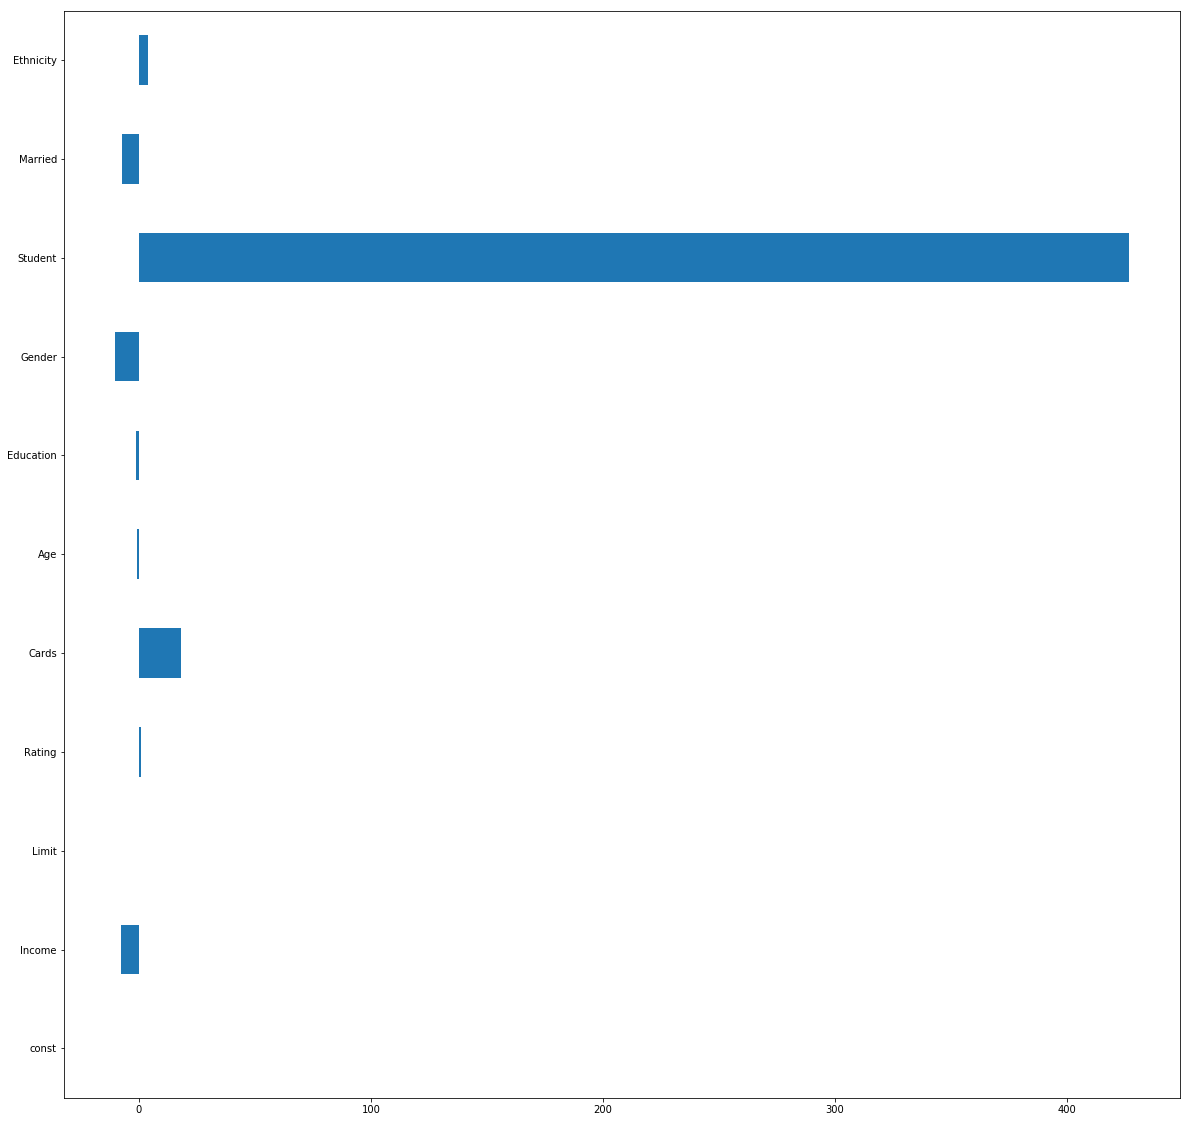

In [178]:
plt.figure(figsize=(20,20))
feature_selected_elastic = pd.Series(elastic.coef_,index = X.columns)
feature_selected_elastic.plot(kind='barh')
plt.show()

#### What does regularization attempt to acheive?

#### What is Gradient Descent? Difference between Stochastic GD, Batch GD and Mini-Batch GD?

##### Stochastic Gradient Descent


##### Batch Gradient Descent

##### Mini-Batch Gradient Descent